Veri de bilinmesi gerekenler;

track_id : şarkı Id

track_name: şarkı adı

acousticness : AKUSTİKLİK

danceability : DANS EDİLEBİLİRLİK	

duration ms	: süre (ms)	

energy	: enerji

instrumentalness key : enstrümantalite anahtarı 

liveness :	canlılık

loudness : ses yüksekliği

mode: modu

speechiness	: konuşkanlık

tempo: tempo

time signature: zaman imzası

valence: değerlik

popularity:Popülerlik



Aşağıdaki hedefler baz alınarak, gerekli analizler yapılmıştır:

-En popüler 5 sanatçı

-En gürültülü 5 parça

-En çok dans edilebilen şarkıya sahip sanatçı

-En iyi 10 enstrümental parça

-70'ten fazla popülariteye sahip parçaların akustikliği..



In [1]:
import numpy as np 
import pandas as pd
from Yardım.EDA import *

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data 

In [2]:
data=pd.read_csv('SpotifyFeatures.csv')

data.sample(10)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
3682,"nothing,nowhere.",5NHZziiWOxvVUq3azUuhtv,waster,0.555000,0.556,170227,0.57800,0.030100,11,0.0654,-10.780,1,0.0358,113.988,3,0.0759,44
55301,Spaze Windu,7KujyeLfrmlsYkrsTmji9Z,Escapism,0.612000,0.703,153000,0.45300,0.836000,4,0.1250,-12.808,1,0.0450,92.060,4,0.5280,10
86809,TTD Cobby,0LmUIrs5wK6RU8UahxDeFV,Big Bag,0.054500,0.754,179304,0.72000,0.000000,0,0.7680,-5.513,1,0.1220,157.971,4,0.5410,0
68301,Logi Pedro,2HGWECjWeg54iK04fWYLH2,Dúfan mín,0.011900,0.716,185020,0.53400,0.000000,0,0.2250,-5.218,1,0.0710,120.012,4,0.5090,1
62910,Relaxing Ambientation,4ObO3IhfxsK8XwvKwG7hBn,Hot and Young,0.977000,0.655,162783,0.00245,0.939000,9,0.1090,-25.186,0,0.0640,127.241,3,0.6110,1
124828,ZAYN,2y4C7yxLi2xAfIdUDNCoxQ,Imprint,0.729000,0.684,190120,0.37700,0.000002,0,0.1450,-8.569,1,0.1130,139.888,4,0.4080,60
130456,Within Temptation,2cprj4IIX0QXOlk6DrrWxS,Raise Your Banner - Single Edit,0.000269,0.354,212586,0.85800,0.000016,1,0.3830,-7.189,1,0.1030,173.977,3,0.5270,55
89601,Kerri Chandler,35ukdi8M8obH4q9BAQv4jP,Keep Me Inside,0.000840,0.799,426162,0.84600,0.772000,11,0.5860,-9.366,0,0.0707,124.024,4,0.4570,17
36732,timmies,1bShqWFWP28HmUFOicwEMh,You Can't Control My Heart,0.875000,0.867,148642,0.24600,0.293000,9,0.1240,-11.381,0,0.0394,110.212,4,0.2790,53
59548,Exit21,1L4PpUGod5HCieYaRPEcVe,Make You Fall,0.057000,0.702,192758,0.55900,0.000012,0,0.1110,-10.427,1,0.1510,160.039,4,0.3240,0


In [3]:
#verinin sutunlarının temel özellikleri ve sutun veri tiplerini görme
DescribeData(data)

                     count           mean            std     min          25%  \
acousticness      130663.0       0.342500       0.345641     0.0       0.0316   
danceability      130663.0       0.581468       0.190077     0.0       0.4590   
duration_ms       130663.0  212633.124098  123155.064847  3203.0  163922.5000   
energy            130663.0       0.569196       0.260312     0.0       0.3960   
instrumentalness  130663.0       0.224018       0.360328     0.0       0.0000   
key               130663.0       5.231894       3.602701     0.0       2.0000   
liveness          130663.0       0.194886       0.167733     0.0       0.0975   
loudness          130663.0      -9.974006       6.544379   -60.0     -11.8980   
mode              130663.0       0.607739       0.488256     0.0       0.0000   
speechiness       130663.0       0.112015       0.124327     0.0       0.0389   
tempo             130663.0     119.473353      30.159636     0.0      96.0140   
time_signature    130663.0  

In [32]:
#NaN değerlerin kontrolü varsa bunların kolonlara oranı
df=controlNaNvalues(data)
df

artist_name         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64
-----



,Bos_Sutunların_oranı
artist_name,0.0
track_name,0.0
acousticness,0.0
danceability,0.0
duration_ms,0.0
energy,0.0
instrumentalness,0.0
key,0.0
liveness,0.0
loudness,0.0


In [5]:
#Gereksiz kolonlardan kurtulma: 
data.drop('track_id',axis=1,inplace=True)

data.tail(4)

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
130659,Saint Claire,Enough for You,0.9180,0.387,194583,0.249,0.0,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,Do It,0.3300,0.717,139191,0.532,0.0,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,No Smoke,0.0079,0.772,180013,0.510,0.0,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50
130662,Banda Los Sebastianes,En Vida,0.5490,0.715,145827,0.734,0.0,3,0.1080,-3.244,1,0.0367,130.128,3,0.9760,55


## EDA 

In [6]:
#En popüler 5 sanatçı demişiz ancak, aşağıdaki dataFrame'de Post Malone'dan iki tane bulunmakta.
data.sort_values(by='popularity',ascending=False)[:5]

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
99393,Daddy Yankee,Con Calma,0.1100,0.737,193227,0.860,0.000002,8,0.0574,-2.652,0,0.0593,93.989,4,0.656,100
99364,Post Malone,Wow.,0.1630,0.833,149520,0.539,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,0.385,98
99368,Billie Eilish,bad guy,0.3080,0.708,194088,0.418,0.093000,0,0.1000,-10.998,1,0.3680,131.926,4,0.578,98
123909,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,0.5200,0.744,158040,0.494,0.000000,2,0.0716,-5.563,1,0.0699,89.972,4,0.927,98
99366,Jonas Brothers,Sucker,0.0427,0.842,181040,0.734,0.000000,1,0.1060,-5.065,0,0.0588,137.958,4,0.952,98


['Daddy Yankee', 'Post Malone', 'Billie Eilish', 'Post Malone', 'Jonas Brothers', 'Ariana Grande']


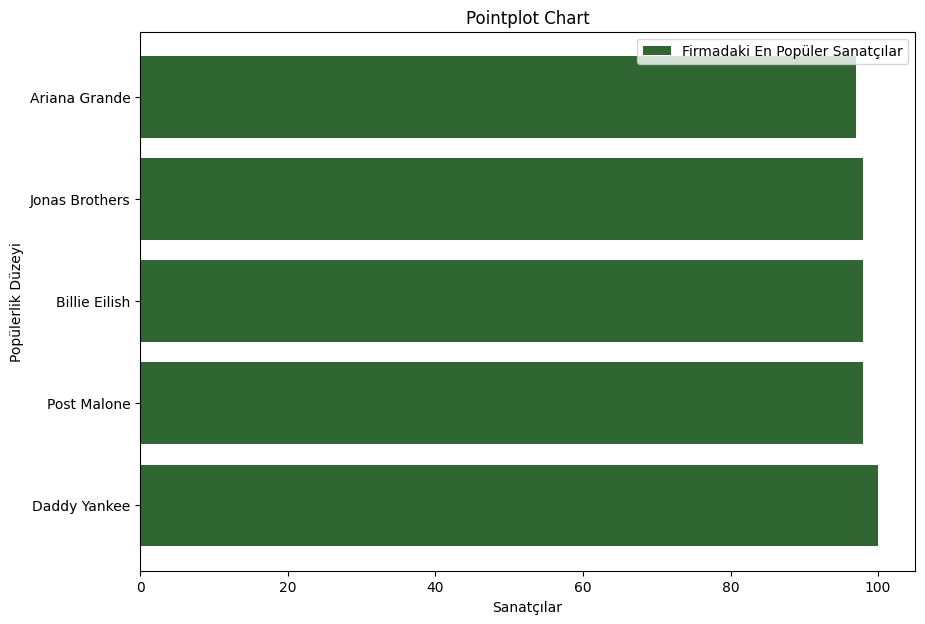

In [7]:
#En popüler 5 sanatçı,
PopularBarPlot(data,6)

In [8]:
data.sort_values(by='loudness',ascending=False)

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
24318,araabMUZIK,Bass,0.0449,0.347,182664,0.892,0.925000,8,0.901,1.806,1,0.1880,81.580,4,0.435,16
20658,"Steve Lieberman, The Gangsta Rabbi",The Diarrhea Song,0.0259,0.113,265822,0.846,0.000721,7,0.893,1.750,0,0.0777,151.378,4,0.061,0
23640,araabMUZIK,Lalalala,0.2100,0.354,246935,0.997,0.897000,10,0.594,1.187,0,0.0904,98.522,3,0.409,15
98408,Govind Bajaniya,Sajan Mara Dilni Rani,0.5940,0.357,344491,0.952,0.000000,1,0.134,0.935,1,0.0672,103.887,3,0.811,0
99459,Ritu Chauhan,Jija Ji Devghar Ghumadi,0.1580,0.651,252500,0.998,0.000000,6,0.481,0.905,1,0.2890,155.052,4,0.605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50315,Old Bike,Khaki Pants,0.0000,0.000,196520,0.000,0.000000,0,0.000,-60.000,0,0.0000,0.000,0,0.000,24
80442,Old Bike,Sober,0.0000,0.000,171083,0.000,0.000000,0,0.000,-60.000,0,0.0000,0.000,0,0.000,23
60844,Old Bike,Delicate,0.0000,0.000,146647,0.000,0.000000,0,0.000,-60.000,0,0.0000,0.000,0,0.000,23
102933,Spencer Wymetalek,Resolve,0.0000,0.000,34923,0.000,0.000000,0,0.000,-60.000,0,0.0000,0.000,0,0.000,56


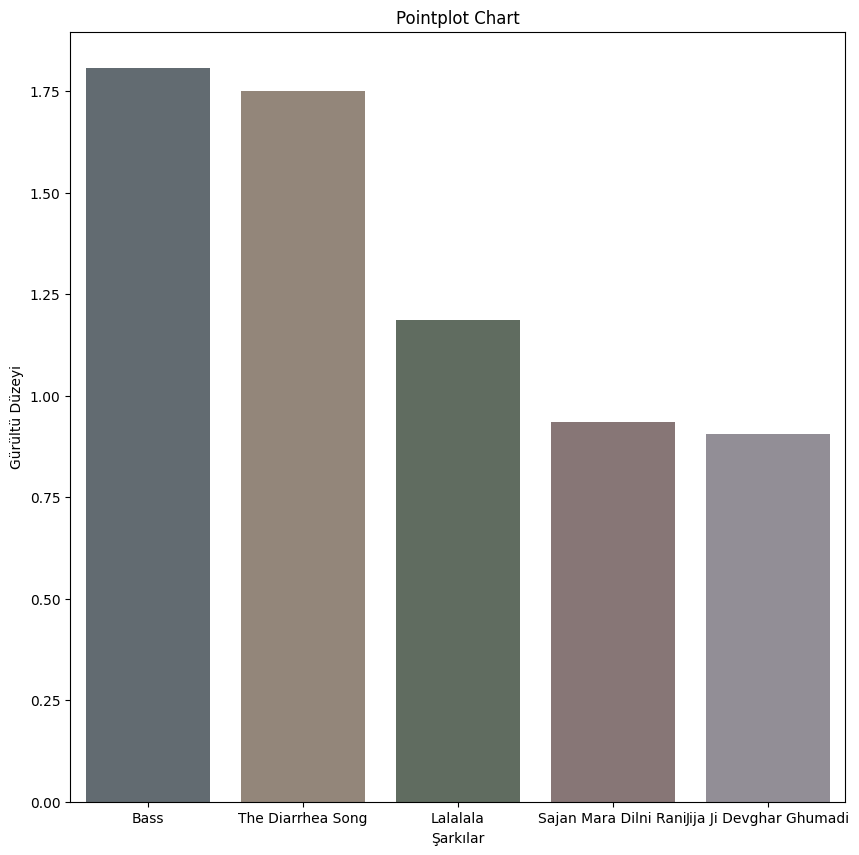

In [10]:
#Şimdi de en gürültülü 5 sanatçıyı bulalım.
LoudnessBarPlot(data,5)

In [20]:
#En çok dans edilebilen şarkıya sahip sanatçı

MostDanceability=data.sort_values(by='danceability',ascending=False)[:1]
MostDanceability


,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
35119,Louie Zong,Tappy Toes,0.579,0.996,64005,0.285,0.528,4,0.0573,-14.849,1,0.559,120.031,4,0.909,28


In [21]:
#Eğer sadece ismi lazım ise;
print(data.loc[MostDanceability.index,"artist_name"])

35119    Louie Zong
Name: artist_name, dtype: object


<Figure size 1000x1000 with 0 Axes>

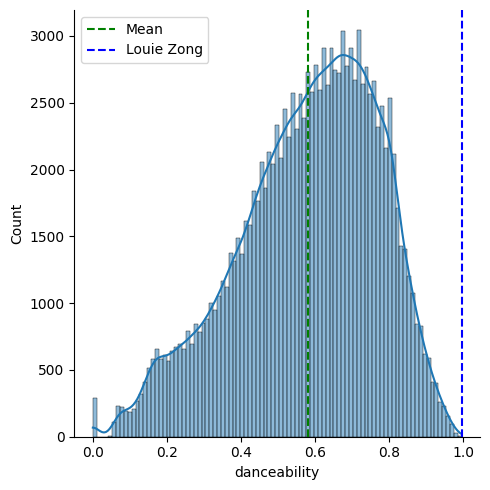

In [26]:
#Peki Louie Zong, Spotify camiasına ne kadar aykırı onu inceleyelim.

plt.figure(figsize=(10,10))

sns.displot(data['danceability'],kde=True)


plt.axvline(x=np.mean(data['danceability']),c='green',ls='--',label='Mean') #ortalama
plt.axvline(x=np.percentile(data['danceability'],100),c='blue',ls='--',label='Louie Zong')#Louie Zong için olacaktır.

plt.legend()
plt.show()

In [45]:
#En iyi 10 enstrümental parça
data.sort_values(by='instrumentalness'
    ,ascending=False)[:10]

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
98698,High Altitude Samples,Soft Brown Noise,0.394,0.000,160003,0.00148,1.0,5,0.111,-31.839,1,0.0000,0.000,0,0.00000,70
68402,Rain Sounds,Gentle Thunderstorm,0.247,0.147,130696,0.99900,1.0,7,0.348,-14.395,1,0.0665,136.235,4,0.00001,28
58349,Granular,Relaxing White Noise One,0.931,0.000,300000,0.00002,1.0,10,0.111,-38.077,0,0.0000,0.000,0,0.00000,40
98021,Audio Receptors,Monotone White Noise,0.915,0.000,182780,0.02300,1.0,5,0.110,-21.528,1,0.0000,0.000,0,0.00000,55
40213,Lucid Dreaming World-Collective Unconscious Mind,Brownian Binaural Bliss,0.996,0.852,152158,0.08500,1.0,0,0.115,-20.343,1,0.0992,119.913,4,0.09450,0
71882,Smoothed Brown Noise,The Brown Noise,0.995,0.226,71880,0.51800,1.0,0,0.103,-27.546,0,0.1120,116.084,4,0.01090,29
30947,Static Canvas,Sweeping White Noise,0.918,0.000,92571,0.00002,1.0,10,0.143,-10.995,1,0.0000,0.000,0,0.00000,0
90227,Relax Looped Noise Sleep,Pink Noise for Babies (Free Sleep Noise),0.000,0.000,180899,0.00002,1.0,10,0.542,-14.197,0,0.0000,0.000,0,0.00000,0
86502,Binaural Beats,REM Sleep and Inner Peace (Theta Waves) - Loop...,0.959,0.214,230000,0.11400,1.0,0,0.112,-30.691,1,0.2110,112.741,4,0.03290,2
49153,Pink Noise,Noise Blocking Pink,0.996,0.000,72231,0.54600,1.0,6,0.534,-20.706,0,0.0000,0.000,0,0.00000,0


['Soft Brown Noise', 'Gentle Thunderstorm', 'Relaxing White Noise One', 'Monotone White Noise', 'Brownian Binaural Bliss', 'The Brown Noise', 'Sweeping White Noise', 'Pink Noise for Babies (Free Sleep Noise)', 'REM Sleep and Inner Peace (Theta Waves) - Loopable', 'Noise Blocking Pink']


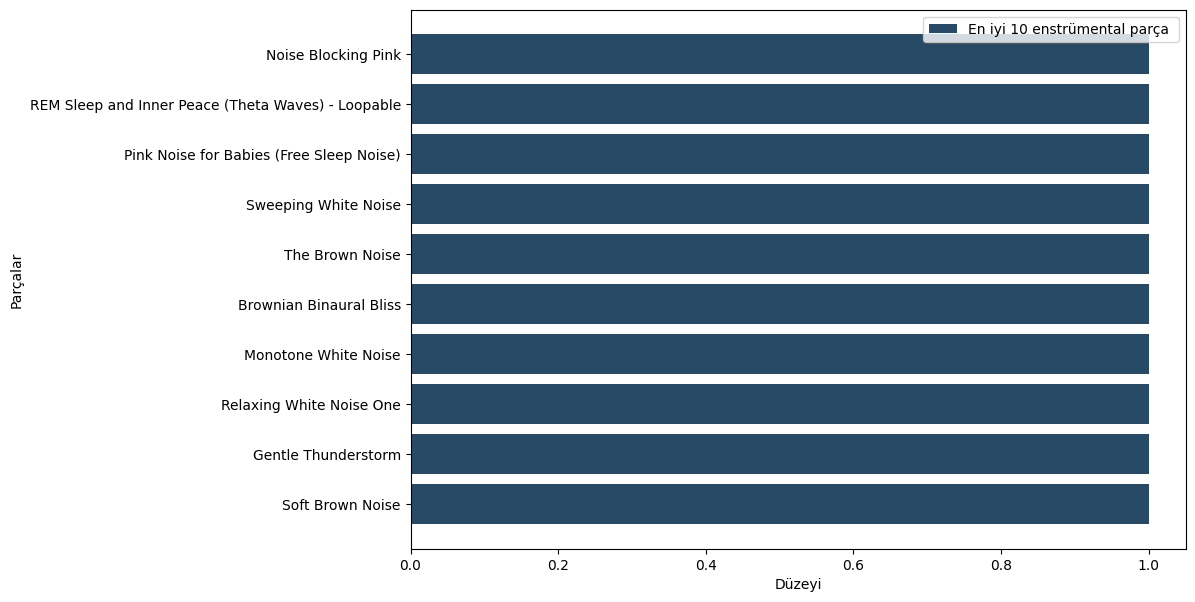

In [50]:
def BarPlot(data,degisken,n,color):
    """datanızı temsil ederken , degisken: datadaki hangi sutunda gösterileceğini temsil eder ,n ise topN temsil etmektedir. En popüler kaç ismi görmek istersiniz gibi.
     color ise color kodunu giriniz. """
    
    mostPopular=data[degisken].sort_values(ascending=False)

    x=list(mostPopular.index[:n])
    y=list(mostPopular.values[:n])

    name=[]
    for i in x:
        name.append(data.loc[i,'track_name'])
    
    print(name)
    plt.figure(figsize=(10,7))
    plt.barh(name,y,label='En iyi 10 enstrümental parça ',color=color)
    plt.ylabel('Parçalar')
    plt.xlabel('Düzeyi')
    
    plt.legend()
    plt.show()



#En iyi 10 enstrümental parça
BarPlot(data,'instrumentalness',10,'#274A66')#data,degiskenAdı,TopN,color kodu şeklinde girilmelidir.


Story-Telling kısmı;
Örneğin bir firma şirketi yeni bir star yaratmaya çalışıyor ve bu starı istastiksel temele dayandırarak veri biliminden faydalanmak için bize başvurdu.